In [146]:
!pip show geopandas

Name: geopandas
Version: 1.0.1
Summary: Geographic pandas extensions
Home-page: 
Author: 
Author-email: Kelsey Jordahl <kjordahl@alum.mit.edu>
License: BSD 3-Clause
Location: /usr/local/lib/python3.10/dist-packages
Requires: numpy, packaging, pandas, pyogrio, pyproj, shapely
Required-by: bigframes


In [147]:
import os, geopandas as gpd

countries=gpd.read_file("https://github.com/XimenaMamani-ctrl/introgeodf/raw/refs/heads/mai/mapas/World_Countries/World_Countries.shp")

In [148]:
# what is it?
type(countries)

geopandas.geodataframe.GeoDataFrame

In [149]:
# dimensions
countries.shape

(252, 2)

In [150]:
# names
countries.columns

Index(['COUNTRY', 'geometry'], dtype='object')

In [151]:
# some content
countries.head()

COUNTRY                                           geometry
0  Aruba (Netherlands)  POLYGON ((-69.88223 12.41111, -69.94695 12.436...
1  Antigua and Barbuda  MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...
2          Afghanistan  POLYGON ((61.27656 35.60725, 61.29638 35.62853...
3              Algeria  POLYGON ((-5.15213 30.18047, -5.13917 30.19236...
4           Azerbaijan  MULTIPOLYGON (((46.54037 38.87559, 46.49554 38...

In [152]:
# what geometry?
countries.geom_type.unique()

array(['Polygon', 'MultiPolygon'], dtype=object)

In [153]:
# any missing values?
countries[countries.isna().any(axis=1)]

Empty GeoDataFrame
Columns: [COUNTRY, geometry]
Index: []

In [154]:
# types
countries.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   COUNTRY   252 non-null    object  
 1   geometry  252 non-null    geometry
dtypes: geometry(1), object(1)
memory usage: 4.1+ KB


<Axes: >

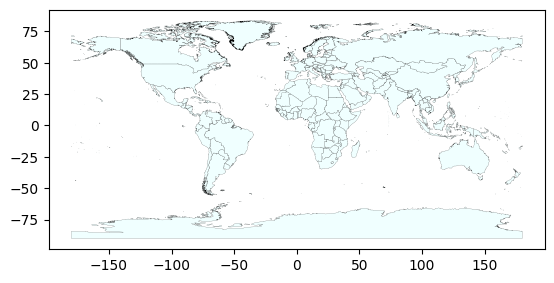

In [155]:
countries.plot(facecolor="azure",#color of polygon fill
               edgecolor='black', #color of lines
               linewidth=0.1) #thickness of lines

In [156]:
rivers=gpd.read_file("https://github.com/XimenaMamani-ctrl/introgeodf/raw/refs/heads/mai/mapas/World_Hydrography/World_Hydrography.shp")
cities=gpd.read_file("https://github.com/XimenaMamani-ctrl/introgeodf/raw/refs/heads/mai/mapas/World_Cities/World_Cities.shp")

In [157]:
# what geo?
rivers.geom_type.unique(), cities.geom_type.unique()

(array(['LineString', 'MultiLineString'], dtype=object),
 array(['Point'], dtype=object))

<Axes: >

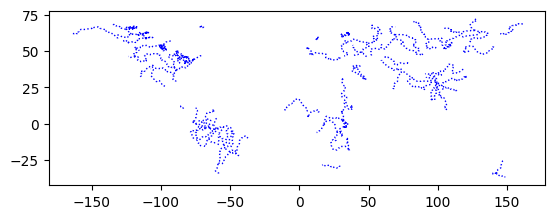

In [158]:
rivers.plot(edgecolor='blue',
            linewidth=1,
            linestyle='dotted')

<Axes: >

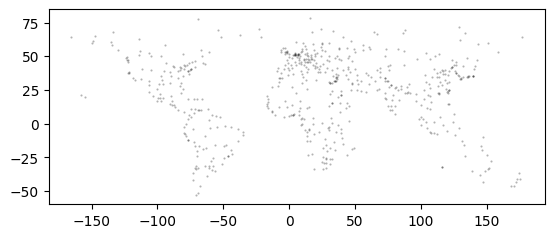

In [159]:
cities.plot(marker='.', # marker type
            color='black',
            markersize=1,
            alpha=0.3) # transparency

<Axes: >

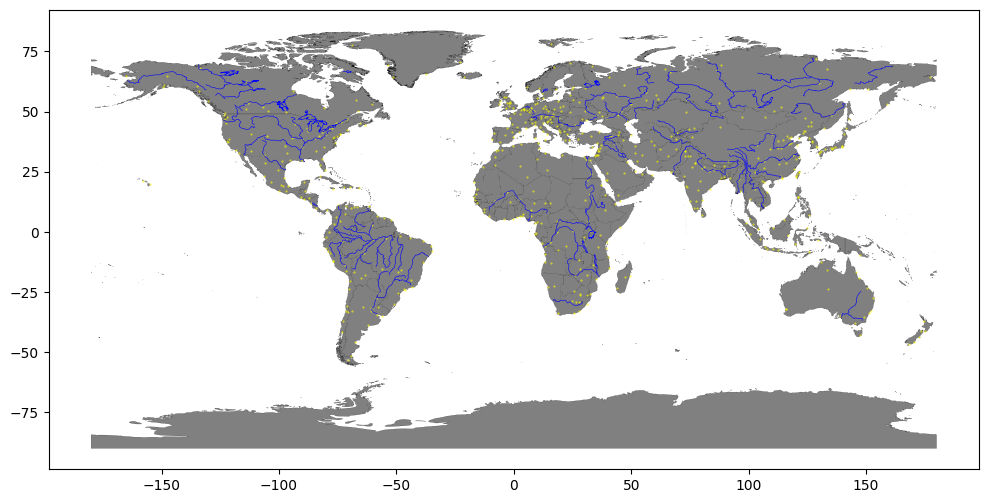

In [160]:
base = countries.plot(facecolor="grey",       #white
                      edgecolor='black',
                      linewidth=0.1,
                      figsize=(12,12))

rivers.plot(edgecolor='blue', linewidth=0.4,
            ax=base)# on top of...
cities.plot(marker='.', color='yellow', markersize=1,alpha=0.7,     #red
            ax=base) # on top of...

In [161]:
# ONE file - SEVERAL layers
import os

countries.to_file(os.path.join("mapas","worldMaps.gpkg"), layer='countries', driver="GPKG")
rivers.to_file(os.path.join("mapas","worldMaps.gpkg"), layer='rivers', driver="GPKG")
cities.to_file(os.path.join("mapas","worldMaps.gpkg"), layer='cities', driver="GPKG")

In [162]:
countries

COUNTRY                                           geometry
0      Aruba (Netherlands)  POLYGON ((-69.88223 12.41111, -69.94695 12.436...
1      Antigua and Barbuda  MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...
2              Afghanistan  POLYGON ((61.27656 35.60725, 61.29638 35.62853...
3                  Algeria  POLYGON ((-5.15213 30.18047, -5.13917 30.19236...
4               Azerbaijan  MULTIPOLYGON (((46.54037 38.87559, 46.49554 38...
..                     ...                                                ...
247            South Sudan  POLYGON ((34.21807 9.96458, 34.20722 9.905, 34...
248              Indonesia  MULTIPOLYGON (((123.21846 -10.80917, 123.19832...
249             East Timor  MULTIPOLYGON (((124.41824 -9.3001, 124.40446 -...
250  Curacao (Netherlands)  POLYGON ((-68.96556 12.19889, -68.91196 12.181...
251  Bonaire (Netherlands)  POLYGON ((-68.19736 12.22264, -68.19292 12.207...

[252 rows x 2 columns]

# **Exercise 1**

In [163]:
spain=countries[countries.COUNTRY=='Spain']

In [164]:
spain.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [165]:
# check units of measurement
spain.crs.axis_info

[Axis(name=Geodetic latitude, abbrev=Lat, direction=north, unit_auth_code=EPSG, unit_code=9122, unit_name=degree),
 Axis(name=Geodetic longitude, abbrev=Lon, direction=east, unit_auth_code=EPSG, unit_code=9122, unit_name=degree)]

In [166]:
# is this CRS projected?
spain.crs.is_projected

False

In [167]:
# centroid
spain.centroid

<ipython-input-167-d0c044ff3ff2>:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  spain.centroid


202    POINT (-3.64846 40.22799)
dtype: geometry

<ipython-input-168-3d32d430be51>:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  spain.to_crs(4326).centroid.plot(color='red',ax=base4326)


<Axes: >

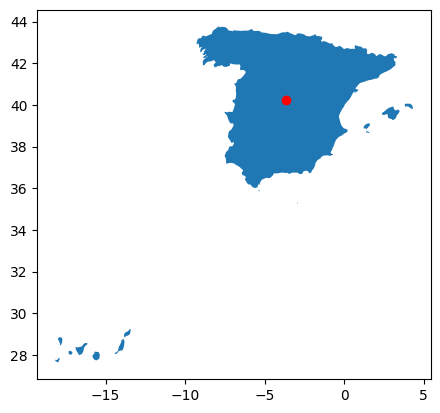

In [168]:
# replotting:

base4326=spain.to_crs(4326).plot()
spain.to_crs(4326).centroid.plot(color='red',ax=base4326)

In [169]:
cities_spain_4326=cities[cities.COUNTRY=='Spain'].to_crs(4326)

In [170]:
rivers_spain_clipped=gpd.clip(rivers,spain)

In [171]:
spain_4326=spain.to_crs(4326)

rivers_spain_4326=rivers_spain_clipped.to_crs(spain_4326.crs)

In [172]:
## saving


import os

spain_4326.to_file(os.path.join("mapas","spainMaps_4326.gpkg"), layer='country', driver="GPKG")
cities_spain_4326.to_file(os.path.join("mapas","spainMaps_4326.gpkg"), layer='cities', driver="GPKG")
rivers_spain_clipped.to_file(os.path.join("mapas","spainMaps_4326.gpkg"), layer='rivers', driver="GPKG")
#spain_4326.centroid.to_file(os.path.join("mapas","spainMaps_4326.gpkg"), layer='centroid', driver="GPKG")

# **Exercise 2**

In [173]:
import pandas as pd
infoairports=pd.read_csv(os.path.join("data","es-airports.csv"))

# some rows

infoairports.iloc[[0,1,2,3,-4,-3,-2,-1],:] #head and tail


id    ident           type  \
0      4004     LEBL  large_airport   
1      4019     LEMD  large_airport   
2      4035     LEPA  large_airport   
3      4020     LEMG  large_airport   
549  533125     LEHV       heliport   
550  549927     LEVO       heliport   
551   43250     LEPV       heliport   
552  321497  ES-0180         closed   

                                               name  latitude_deg  \
0       Josep Tarradellas Barcelona-El Prat Airport     41.297100   
1              Adolfo Suárez Madrid–Barajas Airport     40.471926   
2                         Palma de Mallorca Airport     39.551701   
3                      Málaga-Costa del Sol Airport     36.674900   
549              Alvaro Cunqueiro Hospital Helipad.     42.187797   
550                           Villahermosa Heliport     38.750938   
551  Costa Norte-Puerto de Viveiro-Celeiro Heliport     43.674801   
552                   Aeródromo de Zalla - Forestal     43.186232   

     longitude_deg  elevation_ft continent country_name iso_country  ...  \
0         2.078460          12.0        EU        Spain          ES  ...   
1        -3.562640        1998.0        EU        Spain          ES  ...   
2         2.738810          27.0        EU        Spain          ES  ...   
3        -4.499110          53.0        EU        Spain          ES  ...   
549      -8.714093         675.0        EU        Spain          ES  ...   
550      -2.842076        3169.0        EU        Spain          ES  ...   
551      -7.595230          13.0        EU        Spain          ES  ...   
552      -3.120631        1641.0        EU        Spain          ES  ...   

          municipality scheduled_service gps_code iata_code  local_code  \
0            Barcelona                 1     LEBL       BCN         NaN   
1               Madrid                 1     LEMD       MAD         NaN   
2    Palma de Mallorca                 1     LEPA       PMI         NaN   
3               Málaga                 1     LEMG       AGP         NaN   
549               Vigo                 0     LEHV       NaN         NaN   
550       Villahermosa                 0     LEVO       NaN         NaN   
551             Vivero                 0     LEPV       NaN         NaN   
552              Zalla                 0      NaN       NaN         NaN   

                                             home_link  \
0    https://www.aena.es/en/josep-tarradellas-barce...   
1    https://www.aena.es/en/adolfo-suarez-madrid-ba...   
2        https://www.aena.es/en/palma-de-mallorca.html   
3     https://www.aena.es/en/malaga-costa-del-sol.html   
549                                                NaN   
550                                                NaN   
551                                                NaN   
552                                                NaN   

                                        wikipedia_link  \
0    https://en.wikipedia.org/wiki/Barcelona%E2%80%...   
1    https://en.wikipedia.org/wiki/Adolfo_Su%C3%A1r...   
2    https://en.wikipedia.org/wiki/Son_Sant_Joan_Ai...   
3    https://en.wikipedia.org/wiki/M%C3%A1laga_Airport   
549                                                NaN   
550                                                NaN   
551  https://es.wikipedia.org/wiki/Helipuerto_Costa...   
552                                                NaN   

                                              keywords    score  \
0    El Prat Airport,Barcelona International,Josep ...  1020675   
1        Leganés, Madrid Barajas International Airport  1041675   
2                          Son Sant Joan Airport, LESJ    51200   
3                                Costa del Sol, Malaga    51275   
549                                                NaN        0   
550                                                NaN        0   
551                                                NaN        0   
552                                                NaN        0   

                  last_u

In [174]:
#Se Procede a limpiar la data
#Se elimina la primera fila
infoairports.drop(index=0,inplace=True)
infoairports.reset_index(drop=True, inplace=True)
infoairports.head()

id ident           type                                  name  \
0  4019  LEMD  large_airport  Adolfo Suárez Madrid–Barajas Airport   
1  4035  LEPA  large_airport             Palma de Mallorca Airport   
2  4020  LEMG  large_airport          Málaga-Costa del Sol Airport   
3  3081  GCLP  large_airport                  Gran Canaria Airport   
4  3083  GCTS  large_airport                  Tenerife Sur Airport   

   latitude_deg  longitude_deg  elevation_ft continent country_name  \
0     40.471926       -3.56264        1998.0        EU        Spain   
1     39.551701        2.73881          27.0        EU        Spain   
2     36.674900       -4.49911          53.0        EU        Spain   
3     27.931900      -15.38660          78.0        AF        Spain   
4     28.044500      -16.57250         209.0        AF        Spain   

  iso_country  ...         municipality scheduled_service gps_code iata_code  \
0          ES  ...               Madrid                 1     LEMD       MAD   
1          ES  ...    Palma de Mallorca                 1     LEPA       PMI   
2          ES  ...               Málaga                 1     LEMG       AGP   
3          ES  ...  Gran Canaria Island                 1     GCLP       LPA   
4          ES  ...             Tenerife                 1     GCTS       TFS   

   local_code                                          home_link  \
0         NaN  https://www.aena.es/en/adolfo-suarez-madrid-ba...   
1         NaN      https://www.aena.es/en/palma-de-mallorca.html   
2         NaN   https://www.aena.es/en/malaga-costa-del-sol.html   
3         NaN           https://www.aena.es/en/gran-canaria.html   
4         NaN           https://www.aena.es/en/tenerife-sur.html   

                                      wikipedia_link  \
0  https://en.wikipedia.org/wiki/Adolfo_Su%C3%A1r...   
1  https://en.wikipedia.org/wiki/Son_Sant_Joan_Ai...   
2  https://en.wikipedia.org/wiki/M%C3%A1laga_Airport   
3  https://en.wikipedia.org/wiki/Gran_Canaria_Air...   
4  https://en.wikipedia.org/wiki/Tenerife%E2%80%9...   

                                            keywords    score  \
0      Leganés, Madrid Barajas International Airport  1041675   
1                        Son Sant Joan Airport, LESJ    51200   
2                              Costa del Sol, Malaga    51275   
3  Canary Islands, Las Palmas Airport, Gando Airport  1012275   
4   Canary Islands, Reina Sofía, TCI, Tenerife South  1010675   

                last_updated  
0  2021-10-07T11:02:17+00:00  
1  2022-09-09T19:35:49+00:00  
2  2023-12-05T05:03:14+00:00  
3  2022-11-01T17:26:09+00:00  
4  2022-11-01T17:26:25+00:00  

[5 rows x 23 columns]

In [175]:
infoairports.columns

Index(['id', 'ident', 'type', 'name', 'latitude_deg', 'longitude_deg',
       'elevation_ft', 'continent', 'country_name', 'iso_country',
       'region_name', 'iso_region', 'local_region', 'municipality',
       'scheduled_service', 'gps_code', 'iata_code', 'local_code', 'home_link',
       'wikipedia_link', 'keywords', 'score', 'last_updated'],
      dtype='object')

In [176]:
keep=['name','type','latitude_deg', 'longitude_deg','elevation_ft','region_name','municipality']
infoairports=infoairports.loc[:,keep]

infoairports.info()

#Para saber que esto es un geo data frame, una de las columnas debe tener de Dtype, geometry

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552 entries, 0 to 551
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           552 non-null    object 
 1   type           552 non-null    object 
 2   latitude_deg   552 non-null    float64
 3   longitude_deg  552 non-null    float64
 4   elevation_ft   431 non-null    float64
 5   region_name    552 non-null    object 
 6   municipality   476 non-null    object 
dtypes: float64(3), object(4)
memory usage: 30.3+ KB


In [177]:
numericCols=['latitude_deg', 'longitude_deg','elevation_ft']
infoairports[numericCols]=infoairports.loc[:,numericCols].apply(lambda x:pd.to_numeric(x))

infoairports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552 entries, 0 to 551
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           552 non-null    object 
 1   type           552 non-null    object 
 2   latitude_deg   552 non-null    float64
 3   longitude_deg  552 non-null    float64
 4   elevation_ft   431 non-null    float64
 5   region_name    552 non-null    object 
 6   municipality   476 non-null    object 
dtypes: float64(3), object(4)
memory usage: 30.3+ KB


<Axes: xlabel='longitude_deg', ylabel='latitude_deg'>

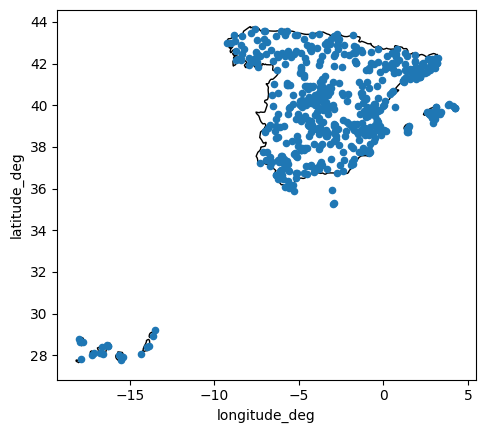

In [178]:
base = spain_4326.plot(color='white', edgecolor='black') #unprojected

infoairports.plot.scatter(x = 'longitude_deg', y = 'latitude_deg',ax=base)

<Axes: >

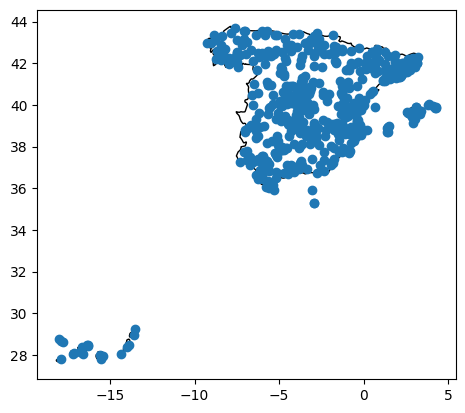

In [179]:
airports=gpd.GeoDataFrame(data=infoairports.copy(),
                 geometry=gpd.points_from_xy(infoairports.longitude_deg,
                                             infoairports.latitude_deg),
                 crs=spain.crs.to_epsg())# the coordinates were in degrees - unprojected

# let's plot

base = spain_4326.plot(color='white', edgecolor='black')
airports.plot(ax=base)

In [180]:
#remember:
type(airports), type(infoairports)

(geopandas.geodataframe.GeoDataFrame, pandas.core.frame.DataFrame)

<Axes: >

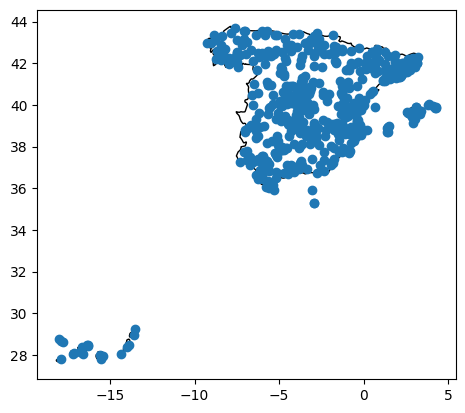

In [181]:
airports_4326=airports.to_crs(4326)

## then

base = spain_4326.plot(color='white', edgecolor='black')
airports_4326.plot(ax=base)

In [182]:
airports_4326['type'].value_counts() # this will not work: airports.type.value_counts()

type
small_airport     312
heliport          155
medium_airport     43
closed             30
large_airport      10
balloonport         1
seaplane_base       1
Name: count, dtype: int64

In [183]:
airports_4326.rename(columns={'type':'kind'},inplace=True)

#Añadir la infomración de aeropuertos al GPKG
airports_4326.to_file(os.path.join("mapas","spainMaps_4326.gpkg"), layer='airports', driver="GPKG")

# Exercise **3**

In [184]:
spain_4326

COUNTRY                                           geometry
202   Spain  MULTIPOLYGON (((-6.94653 40.25898, -6.91028 40...

In [185]:
spain_4326.boundary

202    MULTILINESTRING ((-6.94653 40.25898, -6.91028 ...
dtype: geometry

<Axes: >

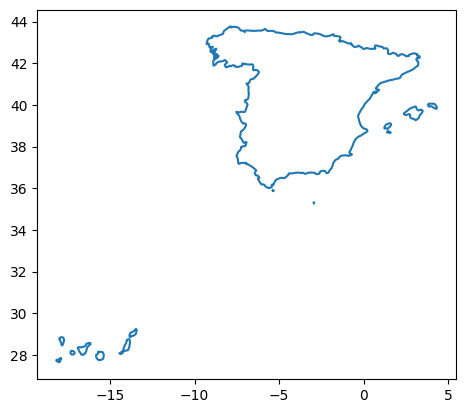

In [186]:
spain_4326.boundary.plot()

In [187]:
# does 'boundary' return a GDF?
type(spain_4326.boundary)

geopandas.geoseries.GeoSeries

In [188]:
# converting into GDF
spain_4326.boundary.to_frame()

0
202  MULTILINESTRING ((-6.94653 40.25898, -6.91028 ...

In [189]:
spain_4326.boundary.to_frame().info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 1 entries, 202 to 202
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   0       1 non-null      geometry
dtypes: geometry(1)
memory usage: 16.0 bytes


In [190]:
# conversion
spain_border=spain_4326.boundary.to_frame()

# new column (optional)
spain_border['name']='Spain'

# renaming the geometry column
spain_border.rename(columns={0:'geometry'},inplace=True)

#setting the geometry (the name is not enough)
spain_border = spain_border.set_geometry("geometry")

# verifying:
spain_border.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [191]:
spain_border

geometry   name
202  MULTILINESTRING ((-6.94653 40.25898, -6.91028 ...  Spain

# Exercise **4**

In [192]:
spain_states=gpd.read_file("https://github.com/XimenaMamani-ctrl/introgeodf/raw/refs/heads/mai/mapas/gadm41_ESP_shp/gadm41_ESP_1.shp")
spain_municipalities=gpd.read_file("https://github.com/XimenaMamani-ctrl/introgeodf/raw/refs/heads/mai/mapas/gadm41_ESP_shp/gadm41_ESP_2.shp")

In [193]:
type(spain_states), type(spain_municipalities)

(geopandas.geodataframe.GeoDataFrame, geopandas.geodataframe.GeoDataFrame)

In [194]:
spain_states.geometry.head()

0    MULTIPOLYGON (((-3.03125 35.94069, -3.03125 35...
1    POLYGON ((-0.8169 39.89858, -0.81272 39.89801,...
2    MULTIPOLYGON (((-3.93629 42.90813, -3.93672 42...
3    MULTIPOLYGON (((-1.45231 38.58182, -1.46655 38...
4    MULTIPOLYGON (((-5.62101 40.24145, -5.62189 40...
Name: geometry, dtype: geometry

In [195]:
spain_municipalities.geometry.head()

0    MULTIPOLYGON (((-3.03069 35.94125, -3.03097 35...
1    MULTIPOLYGON (((-5.84125 36.12822, -5.84125 36...
2    MULTIPOLYGON (((-4.248 37.26915, -4.26312 37.2...
3    POLYGON ((-3.35118 36.72847, -3.35153 36.72847...
4    MULTIPOLYGON (((-6.34222 36.80312, -6.34444 36...
Name: geometry, dtype: geometry

In [196]:
spain_states.crs, spain_municipalities.crs

(<Geographic 2D CRS: EPSG:4326>
 Name: WGS 84
 Axis Info [ellipsoidal]:
 - Lat[north]: Geodetic latitude (degree)
 - Lon[east]: Geodetic longitude (degree)
 Area of Use:
 - name: World.
 - bounds: (-180.0, -90.0, 180.0, 90.0)
 Datum: World Geodetic System 1984 ensemble
 - Ellipsoid: WGS 84
 - Prime Meridian: Greenwich,
 <Geographic 2D CRS: EPSG:4326>
 Name: WGS 84
 Axis Info [ellipsoidal]:
 - Lat[north]: Geodetic latitude (degree)
 - Lon[east]: Geodetic longitude (degree)
 Area of Use:
 - name: World.
 - bounds: (-180.0, -90.0, 180.0, 90.0)
 Datum: World Geodetic System 1984 ensemble
 - Ellipsoid: WGS 84
 - Prime Meridian: Greenwich)

<Axes: >

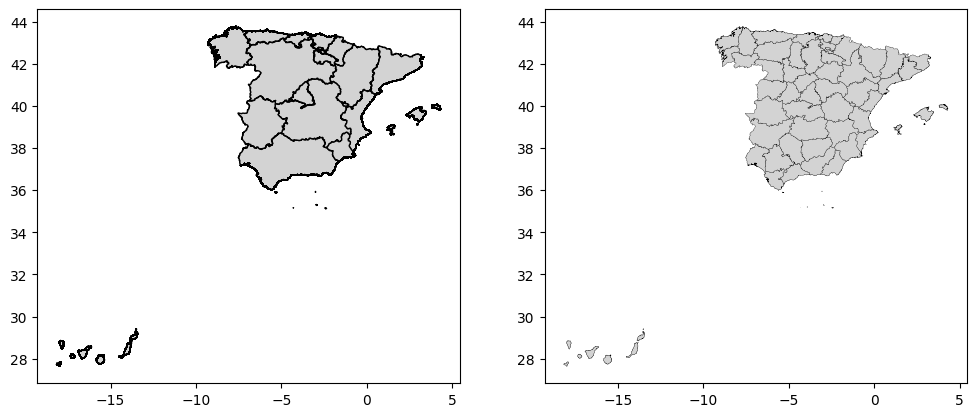

In [197]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=False, sharey=False, figsize=(12,12))

spain_states.plot(ax=ax1, facecolor='lightgrey', edgecolor='black')
spain_municipalities.plot(ax=ax2, facecolor='lightgrey', edgecolor='black',linewidth=0.2)

In [198]:
## uncomment this to see the error message
# spain_states.to_crs(4326)

In [199]:
# set as unprojected
spain_states.crs = "EPSG:4326"
spain_municipalities.crs = "EPSG:4326"

In [200]:
spain_states=spain_states.to_crs(4326)
spain_municipalities=spain_municipalities.to_crs(4326)

# Exercise 5

In [201]:
countries.head()

COUNTRY                                           geometry
0  Aruba (Netherlands)  POLYGON ((-69.88223 12.41111, -69.94695 12.436...
1  Antigua and Barbuda  MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...
2          Afghanistan  POLYGON ((61.27656 35.60725, 61.29638 35.62853...
3              Algeria  POLYGON ((-5.15213 30.18047, -5.13917 30.19236...
4           Azerbaijan  MULTIPOLYGON (((46.54037 38.87559, 46.49554 38...

In [202]:
import pandas as pd

fragilityCiaLink="https://github.com/CienciaDeDatosEspacial/merging/raw/main/FragilityCia_isos.csv"

fragilityCia=pd.read_csv(fragilityCiaLink)

fragilityCia.head()

Officialstatename InternetccTLD iso2 iso3  \
0          The Islamic Republic of Afghanistan           .af   AF  AFG   
1                      The Republic of Albania           .al   AL  ALB   
2  The People's Democratic Republic of Algeria           .dz   DZ  DZA   
3                       The Republic of Angola           .ao   AO  AGO   
4                          Antigua and Barbuda           .ag   AG  ATG   

               Country  fragility_date  fragility          co2  co2_date  \
0          AFGHANISTAN            2019      105.0    7893000.0      2019   
1              ALBANIA            2019       58.9    3794000.0      2019   
2              ALGERIA            2019       75.4  151633000.0      2019   
3               ANGOLA            2019       87.8   19362000.0      2019   
4  ANTIGUA AND BARBUDA            2019       54.4     729000.0      2019   

                              region  ForestRev_gdp  ForestRev_date  
0                         SOUTH ASIA           0.20            2018  
1                             EUROPE           0.18            2018  
2                             AFRICA           0.10            2018  
3                             AFRICA           0.36            2018  
4  CENTRAL AMERICA AND THE CARIBBEAN           0.00            2018

In [203]:
# to upper case.
countries['COUNTRY']=countries.COUNTRY.str.upper()

In [204]:
onlyFragilCia=set(fragilityCia.Country)- set(countries.COUNTRY)
onlyMap=set(countries.COUNTRY)- set(fragilityCia.Country)

In [205]:
onlyFragilCia

{'BAHAMAS (THE)',
 'BOLIVIA (PLURINATIONAL STATE OF)',
 'BRUNEI DARUSSALAM',
 'CABO VERDE',
 'CENTRAL AFRICAN REPUBLIC (THE)',
 'COMOROS (THE)',
 'CONGO (THE DEMOCRATIC REPUBLIC OF THE)',
 'CONGO (THE)',
 'CZECHIA',
 "CÔTE D'IVOIRE",
 'DOMINICAN REPUBLIC (THE)',
 'ESWATINI',
 'GAMBIA (THE)',
 'IRAN (ISLAMIC REPUBLIC OF)',
 'KOREA (THE REPUBLIC OF)',
 "LAO PEOPLE'S DEMOCRATIC REPUBLIC (THE)",
 'MICRONESIA (FEDERATED STATES OF)',
 'MOLDOVA (THE REPUBLIC OF)',
 'NETHERLANDS (THE)',
 'NIGER (THE)',
 'NORTH MACEDONIA',
 'PHILIPPINES (THE)',
 'RUSSIAN FEDERATION (THE)',
 'SAMOA',
 'SUDAN (THE)',
 'TANZANIA, THE UNITED REPUBLIC OF',
 'TIMOR-LESTE',
 'UNITED ARAB EMIRATES (THE)',
 'UNITED KINGDOM OF GREAT BRITAIN AND NORTHERN IRELAND (THE)',
 'UNITED STATES OF AMERICA (THE)',
 'VIET NAM'}

In [206]:
onlyMap

{'AMERICAN SAMOA (US)',
 'AMERICAN VIRGIN ISLANDS (US)',
 'ANDORRA',
 'ANGUILLA (UK)',
 'ANTARCTICA',
 'ARUBA (NETHERLANDS)',
 'BAHAMAS',
 'BAKER ISLAND (US)',
 'BERMUDA (UK)',
 'BOLIVIA',
 'BONAIRE (NETHERLANDS)',
 'BOUVET ISLAND (NORWAY)',
 'BRITISH INDIAN OCEAN TERRITORY (UK)',
 'BRITISH VIRGIN ISLANDS(UK)',
 'BRUNEI',
 'CAPE VERDE',
 'CAYMAN ISLANDS (UK)',
 'CENTRAL AFRICAN REPUBLIC',
 'CHRISTMAS ISLAND (AUSTRALIA)',
 'COCOS (KEELING) ISLANDS (AUSTRALIA)',
 'COMOROS',
 'CONGO',
 'COOK ISLANDS (NEW ZEALAND)',
 'CURACAO (NETHERLANDS)',
 'CZECH REPUBLIC',
 'DEMOCRATIC REPUBLIC OF THE CONGO',
 'DOMINICA',
 'DOMINICAN REPUBLIC',
 'EAST TIMOR',
 'ERITREA',
 'FALKLAND ISLANDS (UK)',
 'FAROE ISLANDS (DENMARK)',
 'FEDERATED STATES OF MICRONESIA',
 'FRENCH GUIANA (FRANCE)',
 'FRENCH POLYNESIA (FRANCE)',
 'FRENCH SOUTHERN & ANTARCTIC LANDS (FRANCE)',
 'GAMBIA',
 'GIBRALTAR (UK)',
 'GLORIOSO ISLANDS (FRANCE)',
 'GREENLAND (DENMARK)',
 'GUADELOUPE (FRANCE)',
 'GUAM (US)',
 'GUERNSEY (UK)',
 'HE

In [207]:
!pip install thefuzz

In [208]:
from thefuzz import process

[(country, process.extractOne(country,onlyMap)) for country in sorted(onlyFragilCia)]

[('BAHAMAS (THE)', ('BAHAMAS', 90)),
 ('BOLIVIA (PLURINATIONAL STATE OF)', ('BOLIVIA', 90)),
 ('BRUNEI DARUSSALAM', ('BRUNEI', 90)),
 ('CABO VERDE', ('CAPE VERDE', 80)),
 ('CENTRAL AFRICAN REPUBLIC (THE)', ('CENTRAL AFRICAN REPUBLIC', 95)),
 ('COMOROS (THE)', ('COMOROS', 90)),
 ('CONGO (THE DEMOCRATIC REPUBLIC OF THE)',
  ('DEMOCRATIC REPUBLIC OF THE CONGO', 95)),
 ('CONGO (THE)', ('CONGO', 90)),
 ('CZECHIA', ('CZECH REPUBLIC', 75)),
 ("CÔTE D'IVOIRE", ('IVORY COAST', 58)),
 ('DOMINICAN REPUBLIC (THE)', ('DOMINICAN REPUBLIC', 95)),
 ('ESWATINI', ('LIECHTENSTEIN', 60)),
 ('GAMBIA (THE)', ('GAMBIA', 90)),
 ('IRAN (ISLAMIC REPUBLIC OF)', ('IRAN', 90)),
 ('KOREA (THE REPUBLIC OF)', ('CZECH REPUBLIC', 86)),
 ("LAO PEOPLE'S DEMOCRATIC REPUBLIC (THE)", ('CZECH REPUBLIC', 86)),
 ('MICRONESIA (FEDERATED STATES OF)', ('FEDERATED STATES OF MICRONESIA', 95)),
 ('MOLDOVA (THE REPUBLIC OF)', ('MOLDOVA', 90)),
 ('NETHERLANDS (THE)', ('NETHERLANDS', 95)),
 ('NIGER (THE)', ('NIGER', 90)),
 ('NORTH MACE

In [209]:
# keeping high scores

[(country, process.extractOne(country,onlyMap)) for country in sorted(onlyFragilCia)
 if process.extractOne(country,onlyMap)[1]>=90]

[('BAHAMAS (THE)', ('BAHAMAS', 90)),
 ('BOLIVIA (PLURINATIONAL STATE OF)', ('BOLIVIA', 90)),
 ('BRUNEI DARUSSALAM', ('BRUNEI', 90)),
 ('CENTRAL AFRICAN REPUBLIC (THE)', ('CENTRAL AFRICAN REPUBLIC', 95)),
 ('COMOROS (THE)', ('COMOROS', 90)),
 ('CONGO (THE DEMOCRATIC REPUBLIC OF THE)',
  ('DEMOCRATIC REPUBLIC OF THE CONGO', 95)),
 ('CONGO (THE)', ('CONGO', 90)),
 ('DOMINICAN REPUBLIC (THE)', ('DOMINICAN REPUBLIC', 95)),
 ('GAMBIA (THE)', ('GAMBIA', 90)),
 ('IRAN (ISLAMIC REPUBLIC OF)', ('IRAN', 90)),
 ('MICRONESIA (FEDERATED STATES OF)', ('FEDERATED STATES OF MICRONESIA', 95)),
 ('MOLDOVA (THE REPUBLIC OF)', ('MOLDOVA', 90)),
 ('NETHERLANDS (THE)', ('NETHERLANDS', 95)),
 ('NIGER (THE)', ('NIGER', 90)),
 ('NORTH MACEDONIA', ('MACEDONIA', 90)),
 ('PHILIPPINES (THE)', ('PHILIPPINES', 95)),
 ('RUSSIAN FEDERATION (THE)', ('RUSSIA', 90)),
 ('SAMOA', ('AMERICAN SAMOA (US)', 90)),
 ('SUDAN (THE)', ('SUDAN', 90)),
 ('TANZANIA, THE UNITED REPUBLIC OF', ('TANZANIA', 90)),
 ('UNITED ARAB EMIRATES (T

In [210]:
## Preparing a dict of changes:
# then:
try1={country: process.extractOne(country,onlyMap)[0] for country in sorted(onlyFragilCia)
 if process.extractOne(country,onlyMap)[1]>=90}
try1

{'BAHAMAS (THE)': 'BAHAMAS',
 'BOLIVIA (PLURINATIONAL STATE OF)': 'BOLIVIA',
 'BRUNEI DARUSSALAM': 'BRUNEI',
 'CENTRAL AFRICAN REPUBLIC (THE)': 'CENTRAL AFRICAN REPUBLIC',
 'COMOROS (THE)': 'COMOROS',
 'CONGO (THE DEMOCRATIC REPUBLIC OF THE)': 'DEMOCRATIC REPUBLIC OF THE CONGO',
 'CONGO (THE)': 'CONGO',
 'DOMINICAN REPUBLIC (THE)': 'DOMINICAN REPUBLIC',
 'GAMBIA (THE)': 'GAMBIA',
 'IRAN (ISLAMIC REPUBLIC OF)': 'IRAN',
 'MICRONESIA (FEDERATED STATES OF)': 'FEDERATED STATES OF MICRONESIA',
 'MOLDOVA (THE REPUBLIC OF)': 'MOLDOVA',
 'NETHERLANDS (THE)': 'NETHERLANDS',
 'NIGER (THE)': 'NIGER',
 'NORTH MACEDONIA': 'MACEDONIA',
 'PHILIPPINES (THE)': 'PHILIPPINES',
 'RUSSIAN FEDERATION (THE)': 'RUSSIA',
 'SAMOA': 'AMERICAN SAMOA (US)',
 'SUDAN (THE)': 'SUDAN',
 'TANZANIA, THE UNITED REPUBLIC OF': 'TANZANIA',
 'UNITED ARAB EMIRATES (THE)': 'UNITED ARAB EMIRATES',
 'UNITED KINGDOM OF GREAT BRITAIN AND NORTHERN IRELAND (THE)': 'UNITED KINGDOM',
 'UNITED STATES OF AMERICA (THE)': 'UNITED STATES',


In [211]:
## Making changes and updating:
fragilityCia.replace(to_replace={'Country':try1},inplace=True)

# updating
onlyFragilCia=set(fragilityCia.Country)- set(countries.COUNTRY)
onlyMap=set(countries.COUNTRY)- set(fragilityCia.Country)
# new matches
[(country, process.extractOne(country,onlyMap)) for country in sorted(onlyFragilCia)]

[('CABO VERDE', ('CAPE VERDE', 80)),
 ('CZECHIA', ('CZECH REPUBLIC', 75)),
 ("CÔTE D'IVOIRE", ('IVORY COAST', 58)),
 ('ESWATINI', ('LIECHTENSTEIN', 60)),
 ('KOREA (THE REPUBLIC OF)', ('CZECH REPUBLIC', 86)),
 ("LAO PEOPLE'S DEMOCRATIC REPUBLIC (THE)", ('CZECH REPUBLIC', 86)),
 ('TIMOR-LESTE', ('EAST TIMOR', 81))]

In [212]:
# some manual

countries[countries.COUNTRY.str.contains('LAO|SWA|KOR')]

COUNTRY                                           geometry
17      BOTSWANA  POLYGON ((26.40114 -24.63189, 26.38996 -24.627...
120  NORTH KOREA  POLYGON ((125.62979 38.65694, 125.51721 38.717...
122  SOUTH KOREA  MULTIPOLYGON (((126.86922 36.0606, 126.8591 36...
126         LAOS  POLYGON ((104.257 17.88763, 104.23943 17.93722...
243    SWAZILAND  POLYGON ((30.89944 -26.77195, 30.88028 -26.793...

In [213]:
manualChanges={'SWAZILAND':'ESWATINI','LAOS':"LAO PEOPLE'S DEMOCRATIC REPUBLIC (THE)",'SOUTH KOREA':'KOREA (THE REPUBLIC OF)'}

countries.replace(to_replace={'COUNTRY':manualChanges},inplace=True)

# updating
onlyFragilCia=set(fragilityCia.Country)- set(countries.COUNTRY)
onlyMap=set(countries.COUNTRY)- set(fragilityCia.Country)
# new matches
[(country, process.extractOne(country,onlyMap)) for country in sorted(onlyFragilCia)]

[('CABO VERDE', ('CAPE VERDE', 80)),
 ('CZECHIA', ('CZECH REPUBLIC', 75)),
 ("CÔTE D'IVOIRE", ('IVORY COAST', 58)),
 ('TIMOR-LESTE', ('EAST TIMOR', 81))]

In [214]:
# then:
try2={country: process.extractOne(country,onlyMap)[0] for country in sorted(onlyFragilCia)}
try2

{'CABO VERDE': 'CAPE VERDE',
 'CZECHIA': 'CZECH REPUBLIC',
 "CÔTE D'IVOIRE": 'IVORY COAST',
 'TIMOR-LESTE': 'EAST TIMOR'}

In [215]:
# changing
fragilityCia.replace(to_replace={'Country':try2},inplace=True)

# new update
onlyFragilCia=set(fragilityCia.Country)- set(countries.COUNTRY)
onlyMap=set(countries.COUNTRY)- set(fragilityCia.Country)

# new matches
[(country, process.extractOne(country,onlyMap)) for country in sorted(onlyFragilCia)]

[]

In [216]:
##We can not improve the situation.
##Now, when you merge a GDF with a DF, the GDF has to be on the left:
theMapAndData=countries.merge(fragilityCia,left_on='COUNTRY', right_on='Country')

theMapAndData.drop(columns=['Country'],inplace=True) # no need for this column
# here it is (new map):
theMapAndData.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   COUNTRY            171 non-null    object  
 1   geometry           171 non-null    geometry
 2   Officialstatename  171 non-null    object  
 3   InternetccTLD      171 non-null    object  
 4   iso2               170 non-null    object  
 5   iso3               171 non-null    object  
 6   fragility_date     171 non-null    int64   
 7   fragility          171 non-null    float64 
 8   co2                171 non-null    float64 
 9   co2_date           171 non-null    int64   
 10  region             171 non-null    object  
 11  ForestRev_gdp      171 non-null    float64 
 12  ForestRev_date     171 non-null    int64   
dtypes: float64(3), geometry(1), int64(3), object(6)
memory usage: 17.5+ KB


Choropleths; Transformation of data values


In [217]:
## Re Scaling
## We should plan how to color the polygons based on some variable, let me check our variables of interest:

DataNames=['fragility', 'co2', 'ForestRev_gdp']

In [218]:

pd.melt(theMapAndData[DataNames])

variable   value
0        fragility   54.40
1        fragility  105.00
2        fragility   75.40
3        fragility   73.20
4        fragility   58.90
..             ...     ...
508  ForestRev_gdp    4.45
509  ForestRev_gdp    1.61
510  ForestRev_gdp    2.65
511  ForestRev_gdp    0.39
512  ForestRev_gdp    0.13

[513 rows x 2 columns]

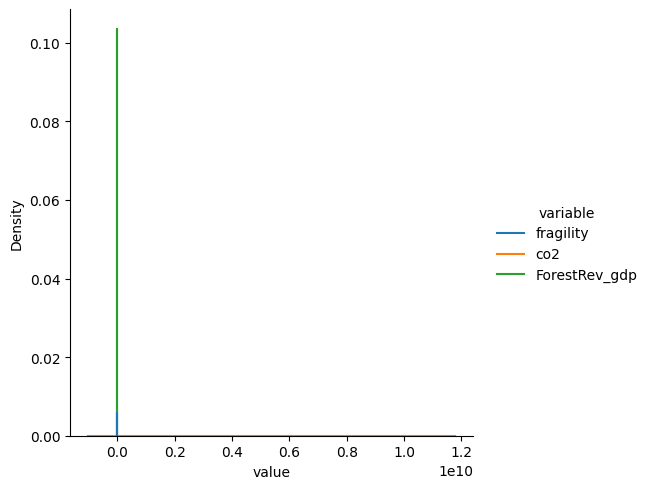

In [219]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.displot(pd.melt(theMapAndData[DataNames]),
            x="value", hue="variable",kind="kde",
            log_scale=(False,False))

In [220]:
##The variables are in different units, we should try a data rescaling strategy:
# !pip install -U scikit-learn

* **QuantileTransformer**:

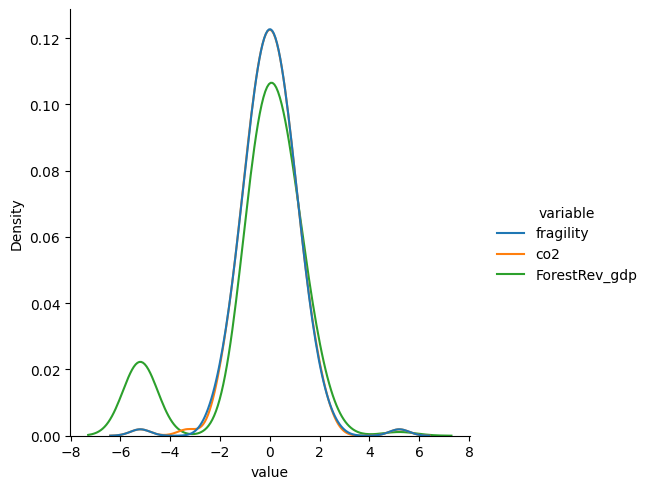

In [221]:
from sklearn.preprocessing import QuantileTransformer
scaler = QuantileTransformer(n_quantiles=99, random_state=0,output_distribution='normal') #or 'uniform'
QtScaled_data = scaler.fit_transform(theMapAndData[DataNames])

sns.displot(pd.melt(pd.DataFrame(QtScaled_data,columns=DataNames)),
            x="value", hue="variable",kind="kde",
            log_scale=(False,False))

In [222]:
try3 = {
    'fragility': QtScaled_data[0, 0],
    'co2': QtScaled_data[0, 1],
    'ForestRev_gdp': QtScaled_data[0, 2]
}
theMapAndData['fragility_Qt']=QtScaled_data[:,0]
theMapAndData['co2_Qt']=QtScaled_data[:,1]
theMapAndData['ForestRev_gdp_Qt']=QtScaled_data[:,2]

In [223]:
## Discretizing
## Install numba before runing the next code
## Make sure you have pysal, mapclassify and numpy installe
! pip show numba mapclassify numpy

Name: numba
Version: 0.60.0
Summary: compiling Python code using LLVM
Home-page: https://numba.pydata.org
Author: 
Author-email: 
License: BSD
Location: /usr/local/lib/python3.10/dist-packages
Requires: llvmlite, numpy
Required-by: cudf-cu12, librosa, rmm-cu12, shap
---
Name: mapclassify
Version: 2.8.1
Summary: Classification Schemes for Choropleth Maps.
Home-page: 
Author: 
Author-email: 
License: BSD 3-Clause
Location: /usr/local/lib/python3.10/dist-packages
Requires: networkx, numpy, pandas, scikit-learn, scipy
Required-by: 
---
Name: numpy
Version: 1.26.4
Summary: Fundamental package for array computing in Python
Home-page: https://numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: Copyright (c) 2005-2023, NumPy Developers.
        All rights reserved.
        
        Redistribution and use in source and binary forms, with or without
        modification, are permitted provided that the following conditions are
        met:
        
            * Redistributions o

In [224]:
!pip install mapclassify
!pip install numba
!pip install numpy

In [225]:
## Let me discretize fragility_Qt:
import mapclassify
import numpy as np

np.random.seed(12345) # so we all get the same results!

# let's try 5 intervals
K=5
theVar=theMapAndData.fragility_Qt
# same interval width, easy interpretation
ei5 = mapclassify.EqualInterval(theVar, k=K)
# same interval width based on standard deviation, easy - but not as the previous one, poor when high skewness
msd = mapclassify.StdMean(theVar)
# interval width varies, counts per interval are close, not easy to grasp, repeated values complicate cuts
q5=mapclassify.Quantiles(theVar,k=K)

# based on similarity, good for multimodal data
mb5 = mapclassify.MaximumBreaks(theVar, k=K)
# based on similarity, good for skewed data
ht = mapclassify.HeadTailBreaks(theVar) # no K needed
# based on similarity, optimizer
fj5 = mapclassify.FisherJenks(theVar, k=K)
# based on similarity, optimizer
jc5 = mapclassify.JenksCaspall(theVar, k=K)
# based on similarity, optimizer
mp5 = mapclassify.MaxP(theVar, k=K)

In [226]:
## Let me discretize co2_Qt:
np.random.seed(12345) # so we all get the same results!
K=5
theVar1=theMapAndData.co2_Qt
# same interval width, easy interpretation
ei5_1 = mapclassify.EqualInterval(theVar1, k=K)
# same interval width based on standard deviation, easy - but not as the previous one, poor when high skewness
msd1 = mapclassify.StdMean(theVar1)
# interval width varies, counts per interval are close, not easy to grasp, repeated values complicate cuts
q5_1=mapclassify.Quantiles(theVar1,k=K)

# based on similarity, good for multimodal data
mb5_1 = mapclassify.MaximumBreaks(theVar1, k=K)
# based on similarity, good for skewed data
ht1 = mapclassify.HeadTailBreaks(theVar1) # no K needed
# based on similarity, optimizer
fj5_1 = mapclassify.FisherJenks(theVar1, k=K)
# based on similarity, optimizer
jc5_1 = mapclassify.JenksCaspall(theVar1, k=K)
# based on similarity, optimizer
mp5_1 = mapclassify.MaxP(theVar1, k=K)

In [227]:
## Let me discretize ForestRev_gdp_Qt:
np.random.seed(56789) # so we all get the same results!
K=5
theVar2=theMapAndData.ForestRev_gdp_Qt
# same interval width, easy interpretation
ei5_2 = mapclassify.EqualInterval(theVar2, k=K)
# same interval width based on standard deviation, easy - but not as the previous one, poor when high skewness
msd2 = mapclassify.StdMean(theVar2)
# interval width varies, counts per interval are close, not easy to grasp, repeated values complicate cuts
q5_2=mapclassify.Quantiles(theVar2,k=K)

# based on similarity, good for multimodal data
mb5_2 = mapclassify.MaximumBreaks(theVar2, k=K)
# based on similarity, good for skewed data
ht2 = mapclassify.HeadTailBreaks(theVar2) # no K needed
# based on similarity, optimizer
fj5_2 = mapclassify.FisherJenks(theVar2, k=K)
# based on similarity, optimizer
jc5_2 = mapclassify.JenksCaspall(theVar2, k=K)
# based on similarity, optimizer
mp5_2 = mapclassify.MaxP(theVar2, k=K)

In [228]:
## Use ADCM to make the comparisson and select the right classification
class5 = ei5,msd, q5,mb5,  ht, fj5, jc5, mp5
# Collect ADCM for each classifier
fits = np.array([ c.adcm for c in class5])
# Convert ADCM scores to a DataFrame
adcms = pd.DataFrame(fits)
# Add classifier names
adcms['classifier'] = [c.name for c in class5]
# Add column names to the ADCM
adcms.columns = ['ADCM_Fragility', 'Classifier']

In [229]:
class5_1 = ei5_1,msd1, q5_1,mb5_1,  ht1, fj5_1, jc5_1, mp5_1
# Collect ADCM for each classifier
fits1 = np.array([ c.adcm for c in class5_1])
# Convert ADCM scores to a DataFrame
adcms1 = pd.DataFrame(fits1)
# Add classifier names
adcms1['classifier'] = [c.name for c in class5_1]
# Add column names to the ADCM
adcms1.columns = ['ADCM_co2', 'Classifier']

In [230]:
class5_2 = ei5_2,msd2, q5_2,mb5_2,  ht2, fj5_2, jc5_2, mp5_2
# Collect ADCM for each classifier
fits2 = np.array([ c.adcm for c in class5_2])
# Convert ADCM scores to a DataFrame
adcms2 = pd.DataFrame(fits2)
# Add classifier names
adcms2['classifier'] = [c.name for c in class5_2]
# Add column names to the ADCM
adcms2.columns = ['ADCM_Forest', 'Classifier']

<Axes: ylabel='Classifier'>

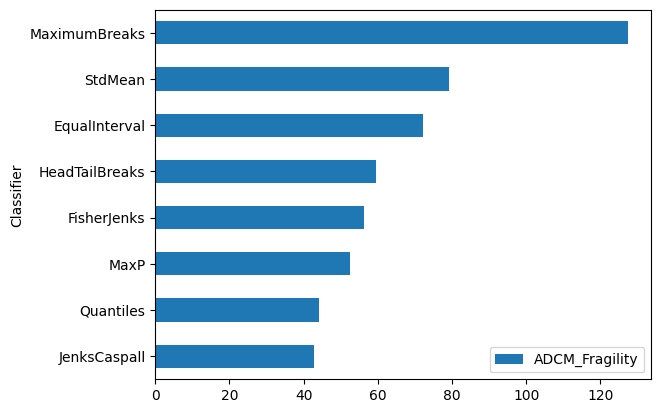

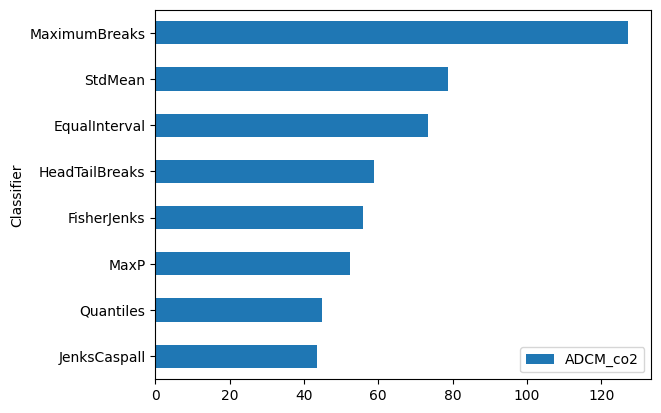

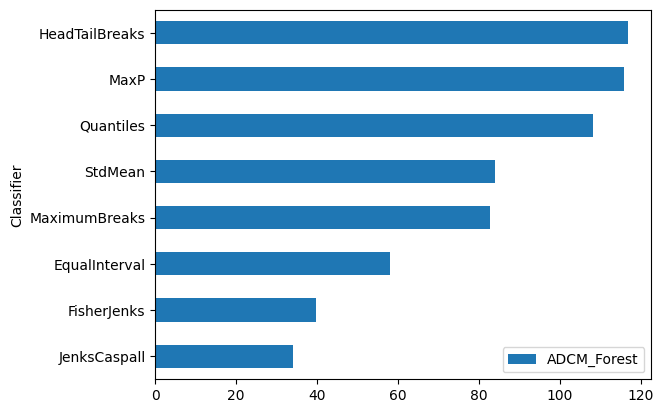

In [231]:
## Plot the adcms:
adcms.sort_values('ADCM_Fragility').plot.barh(x='Classifier')
adcms1.sort_values('ADCM_co2').plot.barh(x='Classifier')
adcms2.sort_values('ADCM_Forest').plot.barh(x='Classifier')

In [232]:
## Save the best strategy:
theMapAndData['fragility_Qt_jc5'] = jc5.yb
theMapAndData['co2_Qt_jc5_1'] = jc5_1.yb
theMapAndData['ForestRev_gdp_Qt_jc5_2'] = jc5_2.yb

In [233]:
# there you are
theMapAndData[['fragility_Qt','fragility_Qt_jc5']].head()

fragility_Qt  fragility_Qt_jc5
0     -0.530113                 1
1      1.827146                 4
2      0.304520                 3
3      0.233695                 2
4     -0.424447                 1

In [234]:
theMapAndData[['co2_Qt','co2_Qt_jc5_1']].head()

co2_Qt  co2_Qt_jc5_1
0 -1.417436             0
1 -0.312096             1
2  0.903225             3
3  0.282063             2
4 -0.757475             1

In [235]:
theMapAndData[['ForestRev_gdp_Qt','ForestRev_gdp_Qt_jc5_2']].head()

ForestRev_gdp_Qt  ForestRev_gdp_Qt_jc5_2
0         -5.199338                       0
1         -0.076809                       2
2         -0.352465                       2
3         -0.827130                       1
4         -0.106447                       2

In [236]:
## The mean of 'fragility_Qt' by the labels of the columns created
indexList=['fragility_Qt_jc5'] # add more?
aggregator={'fragility_Qt': ['mean']}

pd.concat([theMapAndData[['fragility_Qt',col]].groupby(col,as_index=False).agg(aggregator) for col in indexList],axis=1)

fragility_Qt_jc5 fragility_Qt
                           mean
0                0    -1.685317
1                1    -0.652170
2                2    -0.006005
3                3     0.614405
4                4     1.618874

In [237]:
indexList1=['co2_Qt_jc5_1'] # add more?
aggregator1={'co2_Qt': ['mean']}

pd.concat([theMapAndData[['co2_Qt',col]].groupby(col,as_index=False).agg(aggregator1) for col in indexList1],axis=1)

co2_Qt_jc5_1    co2_Qt
                    mean
0            0 -1.663108
1            1 -0.623926
2            2  0.014829
3            3  0.640064
4            4  1.630121

In [238]:
indexList2=['ForestRev_gdp_Qt_jc5_2'] # add more?
aggregator2={'ForestRev_gdp_Qt': ['mean']}

pd.concat([theMapAndData[['ForestRev_gdp_Qt',col]].groupby(col,as_index=False).agg(aggregator2) for col in indexList2],axis=1)

ForestRev_gdp_Qt_jc5_2 ForestRev_gdp_Qt
                                     mean
0                      0        -5.199338
1                      1        -0.762467
2                      2        -0.050787
3                      3         0.635412
4                      4         1.657795

In [239]:
## We could create a new column

# renaming
newLabelsForLevels={0:"0_Great", 1:"1_Good", 2:"2_Middle", 3:"3_Bad", 4:"4_Poor"}

theMapAndData['fragility_Qt_jc5_cat']=theMapAndData.loc[:,'fragility_Qt_jc5'].replace(newLabelsForLevels)

# we have
theMapAndData[['fragility_Qt','fragility_Qt_jc5','fragility_Qt_jc5_cat']].head(20)

fragility_Qt  fragility_Qt_jc5 fragility_Qt_jc5_cat
0      -0.530113                 1               1_Good
1       1.827146                 4               4_Poor
2       0.304520                 3                3_Bad
3       0.233695                 2             2_Middle
4      -0.424447                 1               1_Good
5      -0.179018                 2             2_Middle
6       0.963642                 3                3_Bad
7      -0.284496                 2             2_Middle
8      -0.760554                 1               1_Good
9      -1.963511                 0              0_Great
10     -1.436341                 0              0_Great
11     -0.292032                 2             2_Middle
12     -0.688592                 1               1_Good
13     -0.412568                 1               1_Good
14     -1.310365                 0              0_Great
15     -0.666539                 1               1_Good
16      0.951910                 3                3_Bad
17     -0.318311                 1               1_Good
18      0.088585                 2             2_Middle
19      0.179606                 2             2_Middle

In [240]:
newLabelsForLevels1={0:"0_Great", 1:"1_Good", 2:"2_Middle", 3:"3_Bad", 4:"4_Poor"}

theMapAndData['co2_Qt_jc5_1_cat']=theMapAndData.loc[:,'co2_Qt_jc5_1'].replace(newLabelsForLevels1)

# we have
theMapAndData[['co2_Qt','co2_Qt_jc5_1','co2_Qt_jc5_1_cat']].head(20)

co2_Qt  co2_Qt_jc5_1 co2_Qt_jc5_1_cat
0  -1.417436             0          0_Great
1  -0.312096             1           1_Good
2   0.903225             3            3_Bad
3   0.282063             2         2_Middle
4  -0.757475             1           1_Good
5  -0.514615             1           1_Good
6   0.106163             2         2_Middle
7  -1.740792             0          0_Great
8   0.956291             3            3_Bad
9   1.417745             4           4_Poor
10  0.593317             3            3_Bad
11  0.432222             3            3_Bad
12 -1.076549             0          0_Great
13 -0.547464             1           1_Good
14  0.843291             3            3_Bad
15 -0.720668             1           1_Good
16  0.721761             3            3_Bad
17 -1.633630             0          0_Great
18 -0.004520             2         2_Middle
19  0.072172             2         2_Middle

In [241]:
newLabelsForLevels2={0:"0_Great", 1:"1_Good", 2:"2_Middle", 3:"3_Bad", 4:"4_Poor"}

theMapAndData['ForestRev_gdp_Qt_jc5_2_cat']=theMapAndData.loc[:,'ForestRev_gdp_Qt_jc5_2'].replace(newLabelsForLevels2)

# we have
theMapAndData[['ForestRev_gdp_Qt','ForestRev_gdp_Qt_jc5_2','ForestRev_gdp_Qt_jc5_2_cat']].head(20)

ForestRev_gdp_Qt  ForestRev_gdp_Qt_jc5_2 ForestRev_gdp_Qt_jc5_2_cat
0          -5.199338                       0                    0_Great
1          -0.076809                       2                   2_Middle
2          -0.352465                       2                   2_Middle
3          -0.827130                       1                     1_Good
4          -0.106447                       2                   2_Middle
5           0.088585                       2                   2_Middle
6           0.206072                       2                   2_Middle
7           0.069685                       2                   2_Middle
8          -0.421391                       1                     1_Good
9          -0.271880                       2                   2_Middle
10         -0.536176                       1                     1_Good
11         -5.199338                       0                    0_Great
12         -1.045226                       1                     1_Good
13          0.000000                       2                   2_Middle
14         -0.827130                       1                     1_Good
15         -1.045226                       1                     1_Good
16         -0.477996                       1                     1_Good
17          0.128240                       2                   2_Middle
18          0.322678                       3                      3_Bad
19          0.149689                       2                   2_Middle

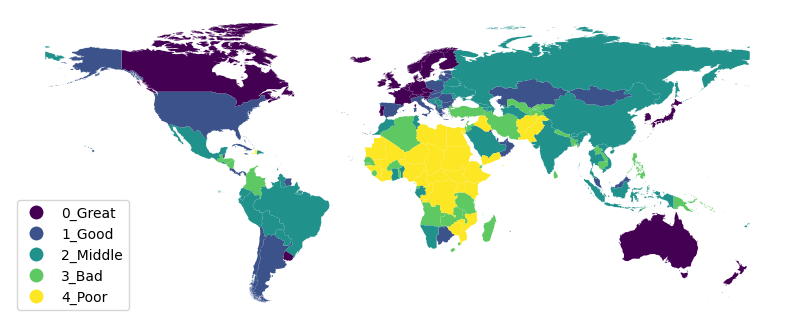

In [242]:
## We are ready for a choropleth:

import matplotlib.pyplot as plt

f, ax = plt.subplots(1, figsize=(10, 10))
theMapAndData.plot(column='fragility_Qt_jc5_cat', # variable to plot
                   cmap='viridis', # set of colors
                   categorical=True, # can be interpreted as category
                   edgecolor='white', # border color
                   linewidth=0., # width of border
                   alpha=1, # level of transparency (0 is invisible)
                   legend=True, # need a legend?
                   # location of legend: 'best', 'upper right', 'upper left', 'lower left',
                   # 'lower right', 'right', 'center left', 'center right',
                   # 'lower center', 'upper center', 'center'
                   legend_kwds={'loc':"lower left"},
        ax=ax
       )

ax.set_axis_off()

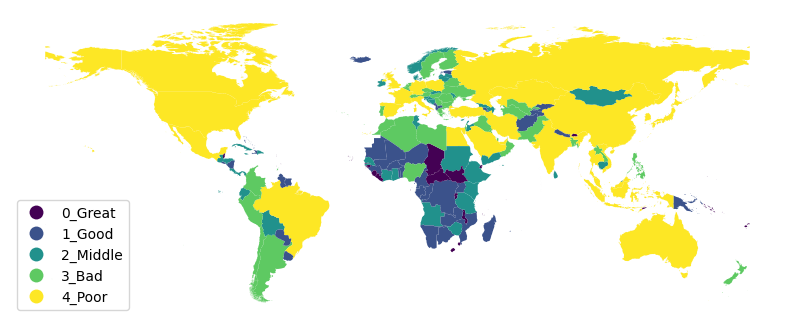

In [243]:
f, ax = plt.subplots(1, figsize=(10, 10))
theMapAndData.plot(column='co2_Qt_jc5_1_cat', # variable to plot
                   cmap='viridis', # set of colors
                   categorical=True, # can be interpreted as category
                   edgecolor='white', # border color
                   linewidth=0., # width of border
                   alpha=1, # level of transparency (0 is invisible)
                   legend=True, # need a legend?
                   # location of legend: 'best', 'upper right', 'upper left', 'lower left',
                   # 'lower right', 'right', 'center left', 'center right',
                   # 'lower center', 'upper center', 'center'
                   legend_kwds={'loc':"lower left"},
        ax=ax
       )

ax.set_axis_off()

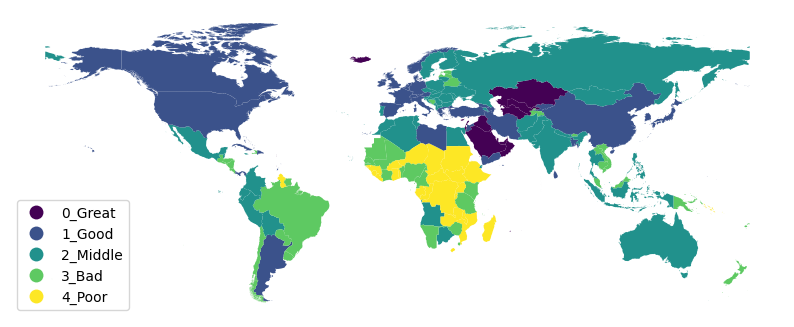

In [244]:
f, ax = plt.subplots(1, figsize=(10, 10))
theMapAndData.plot(column='ForestRev_gdp_Qt_jc5_2_cat', # variable to plot
                   cmap='viridis', # set of colors
                   categorical=True, # can be interpreted as category
                   edgecolor='white', # border color
                   linewidth=0., # width of border
                   alpha=1, # level of transparency (0 is invisible)
                   legend=True, # need a legend?
                   # location of legend: 'best', 'upper right', 'upper left', 'lower left',
                   # 'lower right', 'right', 'center left', 'center right',
                   # 'lower center', 'upper center', 'center'
                   legend_kwds={'loc':"lower left"},
        ax=ax
       )

ax.set_axis_off()

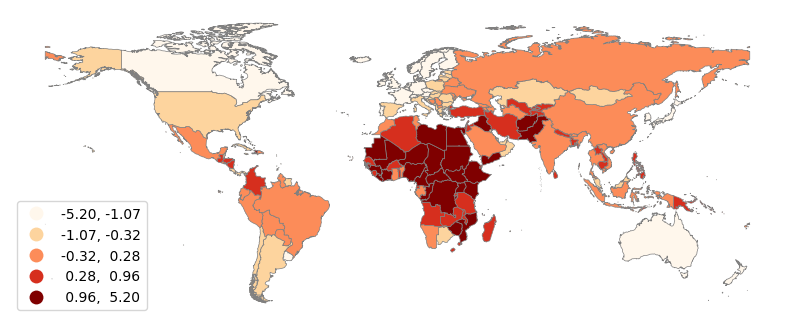

In [245]:
## Once you know the ADCM:
# you can request the choropleth without creating a variable:

import matplotlib.pyplot as plt

f, ax = plt.subplots(1, figsize=(10, 10))
theMapAndData.plot(column='fragility_Qt',
                   cmap='OrRd',
                   scheme="jenkscaspall",k=5,
        edgecolor='grey',
        linewidth=0.5,
        alpha=1,
        legend=True,
        legend_kwds={'loc':3},
        ax=ax
       )

ax.set_axis_off()

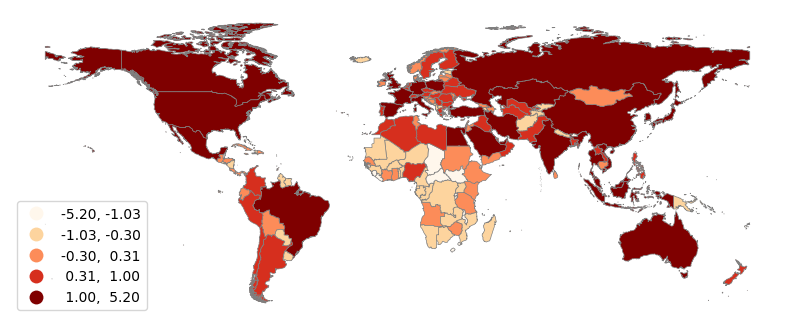

In [246]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, figsize=(10, 10))
theMapAndData.plot(column='co2_Qt',
                   cmap='OrRd',
                   scheme="jenkscaspall",k=5,
        edgecolor='grey',
        linewidth=0.5,
        alpha=1,
        legend=True,
        legend_kwds={'loc':3},
        ax=ax
       )

ax.set_axis_off()

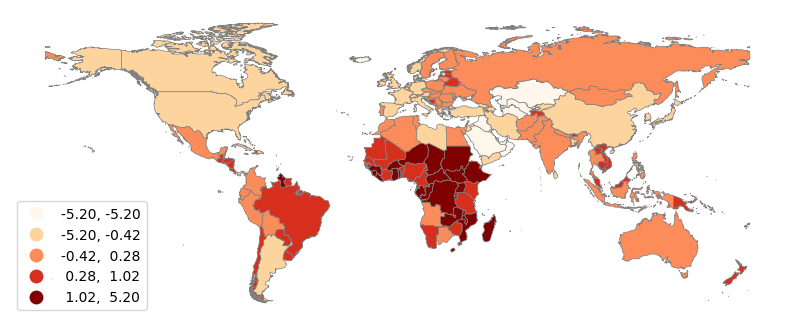

In [247]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, figsize=(10, 10))
theMapAndData.plot(column='ForestRev_gdp_Qt',
                   cmap='OrRd',
                   scheme="jenkscaspall",k=5,
        edgecolor='grey',
        linewidth=0.5,
        alpha=1,
        legend=True,
        legend_kwds={'loc':3},
        ax=ax
       )

ax.set_axis_off()

In [248]:
IDHWORLDLink="https://github.com/JoaoDenilson/World-IDH/raw/refs/heads/master/IDH_paises.csv"

IDHWORLD=pd.read_csv(IDHWORLDLink)

IDHWORLD.head()

pais    IDH
0        Noruega  0,944
1      Austrália  0,935
2          Suíça  0,930
3      Dinamarca  0,923
4  Países Baixos  0,922

In [249]:
countries['COUNTRY'] = countries['COUNTRY'].replace({'pais': 'COUNTRY'})

In [250]:
onlyIDHWORLD=set(IDHWORLD.pais)- set(countries.COUNTRY)
onlyMap1=set(countries.COUNTRY)- set(IDHWORLD.pais)

In [251]:
onlyIDHWORLD

{'Afeganistão',
 'Albânia',
 'Alemanha',
 'Andorra',
 'Angola',
 'Antiga República Iugoslava da Macedônia',
 'Antígua e Barbuda',
 'Argentina',
 'Argélia',
 'Armênia',
 'Arábia Saudita',
 'Austrália',
 'Azerbaijão',
 'Bahamas',
 'Bahrein',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belize',
 'Benin',
 'Bolívia (Estado Plurinacional da)',
 'Botswana',
 'Brasil',
 'Brunei Darussalam',
 'Bulgária',
 'Burkina Faso',
 'Burundi',
 'Butão',
 'Bélgica',
 'Bósnia-Herzegovina',
 'Cabo Verde',
 'Camarões',
 'Camboja',
 'Canadá',
 'Cazaquistão',
 'Chade',
 'Chile',
 'China',
 'Chipre',
 'Colômbia',
 'Comores',
 'Congo',
 'Congo (República Democrática do)',
 'Coreia (República Popular Democrática da)',
 'Coreia (República da)',
 'Costa Rica',
 'Costa do Marfim',
 'Croácia',
 'Cuba',
 'Dinamarca',
 'Djibouti',
 'Dominica',
 'Egito',
 'El Salvador',
 'Emirados Árabes Unidos',
 'Equador',
 'Eritrea',
 'Eslováquia',
 'Eslovênia',
 'Espanha',
 'Estados Unidos',
 'Estônia',
 'Etiópia',
 'Federação Russa',

In [252]:
onlyMap1

{'AFGHANISTAN',
 'ALBANIA',
 'ALGERIA',
 'AMERICAN SAMOA (US)',
 'AMERICAN VIRGIN ISLANDS (US)',
 'ANDORRA',
 'ANGOLA',
 'ANGUILLA (UK)',
 'ANTARCTICA',
 'ANTIGUA AND BARBUDA',
 'ARGENTINA',
 'ARMENIA',
 'ARUBA (NETHERLANDS)',
 'AUSTRALIA',
 'AUSTRIA',
 'AZERBAIJAN',
 'BAHAMAS',
 'BAHRAIN',
 'BAKER ISLAND (US)',
 'BANGLADESH',
 'BARBADOS',
 'BELARUS',
 'BELGIUM',
 'BELIZE',
 'BENIN',
 'BERMUDA (UK)',
 'BHUTAN',
 'BOLIVIA',
 'BONAIRE (NETHERLANDS)',
 'BOSNIA AND HERZEGOVINA',
 'BOTSWANA',
 'BOUVET ISLAND (NORWAY)',
 'BRAZIL',
 'BRITISH INDIAN OCEAN TERRITORY (UK)',
 'BRITISH VIRGIN ISLANDS(UK)',
 'BRUNEI',
 'BULGARIA',
 'BURKINA FASO',
 'BURUNDI',
 'CAMBODIA',
 'CAMEROON',
 'CANADA',
 'CAPE VERDE',
 'CAYMAN ISLANDS (UK)',
 'CENTRAL AFRICAN REPUBLIC',
 'CHAD',
 'CHILE',
 'CHINA',
 'CHRISTMAS ISLAND (AUSTRALIA)',
 'COCOS (KEELING) ISLANDS (AUSTRALIA)',
 'COLOMBIA',
 'COMOROS',
 'CONGO',
 'COOK ISLANDS (NEW ZEALAND)',
 'COSTA RICA',
 'CROATIA',
 'CUBA',
 'CURACAO (NETHERLANDS)',
 'CYPRUS',

In [253]:
from thefuzz import process

[(pais, process.extractOne(pais,onlyMap1)) for pais in sorted(onlyIDHWORLD)]

[('Afeganistão', ('AFGHANISTAN', 76)),
 ('Albânia', ('ALBANIA', 92)),
 ('Alemanha', ('OMAN', 68)),
 ('Andorra', ('ANDORRA', 100)),
 ('Angola', ('ANGOLA', 100)),
 ('Antiga República Iugoslava da Macedônia', ('MACEDONIA', 85)),
 ('Antígua e Barbuda', ('ANTIGUA AND BARBUDA', 86)),
 ('Argentina', ('ARGENTINA', 100)),
 ('Argélia', ('NORFOLK ISLAND (AUSTRALIA)', 72)),
 ('Armênia', ('ARMENIA', 92)),
 ('Arábia Saudita', ('SAUDI ARABIA', 84)),
 ('Austrália', ('AUSTRALIA', 94)),
 ('Azerbaijão', ('AZERBAIJAN', 84)),
 ('Bahamas', ('BAHAMAS', 100)),
 ('Bahrein', ('BAHRAIN', 86)),
 ('Bangladesh', ('BANGLADESH', 100)),
 ('Barbados', ('BARBADOS', 100)),
 ('Belarus', ('BELARUS', 100)),
 ('Belize', ('BELIZE', 100)),
 ('Benin', ('BENIN', 100)),
 ('Bolívia (Estado Plurinacional da)', ('BOLIVIA', 83)),
 ('Botswana', ('BOTSWANA', 100)),
 ('Brasil', ('BRAZIL', 83)),
 ('Brunei Darussalam', ('BRUNEI', 90)),
 ('Bulgária', ('BULGARIA', 93)),
 ('Burkina Faso', ('BURKINA FASO', 100)),
 ('Burundi', ('BURUNDI', 100)

In [254]:
[(pais, process.extractOne(pais,onlyMap1)) for pais in sorted(onlyIDHWORLD)
 if process.extractOne(pais,onlyMap1)[1]>=90]

[('Albânia', ('ALBANIA', 92)),
 ('Andorra', ('ANDORRA', 100)),
 ('Angola', ('ANGOLA', 100)),
 ('Argentina', ('ARGENTINA', 100)),
 ('Armênia', ('ARMENIA', 92)),
 ('Austrália', ('AUSTRALIA', 94)),
 ('Bahamas', ('BAHAMAS', 100)),
 ('Bangladesh', ('BANGLADESH', 100)),
 ('Barbados', ('BARBADOS', 100)),
 ('Belarus', ('BELARUS', 100)),
 ('Belize', ('BELIZE', 100)),
 ('Benin', ('BENIN', 100)),
 ('Botswana', ('BOTSWANA', 100)),
 ('Brunei Darussalam', ('BRUNEI', 90)),
 ('Bulgária', ('BULGARIA', 93)),
 ('Burkina Faso', ('BURKINA FASO', 100)),
 ('Burundi', ('BURUNDI', 100)),
 ('Canadá', ('CANADA', 91)),
 ('Chile', ('CHILE', 100)),
 ('China', ('CHINA', 100)),
 ('Colômbia', ('COLOMBIA', 93)),
 ('Congo', ('CONGO', 100)),
 ('Congo (República Democrática do)', ('CONGO', 90)),
 ('Costa Rica', ('COSTA RICA', 100)),
 ('Cuba', ('CUBA', 100)),
 ('Djibouti', ('DJIBOUTI', 100)),
 ('Dominica', ('DOMINICA', 100)),
 ('El Salvador', ('EL SALVADOR', 100)),
 ('Eritrea', ('ERITREA', 100)),
 ('Estônia', ('ESTONIA', 9

In [255]:
## Preparing a dict of changes:
# then:
try4={pais: process.extractOne(pais,onlyMap1)[0] for pais in sorted(onlyIDHWORLD)
 if process.extractOne(pais,onlyMap1)[1]>=90}
try4

{'Albânia': 'ALBANIA',
 'Andorra': 'ANDORRA',
 'Angola': 'ANGOLA',
 'Argentina': 'ARGENTINA',
 'Armênia': 'ARMENIA',
 'Austrália': 'AUSTRALIA',
 'Bahamas': 'BAHAMAS',
 'Bangladesh': 'BANGLADESH',
 'Barbados': 'BARBADOS',
 'Belarus': 'BELARUS',
 'Belize': 'BELIZE',
 'Benin': 'BENIN',
 'Botswana': 'BOTSWANA',
 'Brunei Darussalam': 'BRUNEI',
 'Bulgária': 'BULGARIA',
 'Burkina Faso': 'BURKINA FASO',
 'Burundi': 'BURUNDI',
 'Canadá': 'CANADA',
 'Chile': 'CHILE',
 'China': 'CHINA',
 'Colômbia': 'COLOMBIA',
 'Congo': 'CONGO',
 'Congo (República Democrática do)': 'CONGO',
 'Costa Rica': 'COSTA RICA',
 'Cuba': 'CUBA',
 'Djibouti': 'DJIBOUTI',
 'Dominica': 'DOMINICA',
 'El Salvador': 'EL SALVADOR',
 'Eritrea': 'ERITREA',
 'Estônia': 'ESTONIA',
 'Fiji': 'FIJI',
 'Geórgia': 'GEORGIA',
 'Guatemala': 'GUATEMALA',
 'Guiana': 'FRENCH GUIANA (FRANCE)',
 'Guinea-Bissau': 'GUINEA-BISSAU',
 'Gâmbia': 'GAMBIA',
 'Haiti': 'HAITI',
 'Honduras': 'HONDURAS',
 'Hong Kong, China (SAR)': 'CHINA',
 'Indonésia': 'I

In [256]:
## Making changes and updating:
IDHWORLD.replace(to_replace={'pais':try4},inplace=True)

# updating
onlyIDHWORLD=set(IDHWORLD.pais)- set(countries.COUNTRY)
onlyMap1=set(countries.COUNTRY)- set(IDHWORLD.pais)
# new matches
[(pais, process.extractOne(pais,onlyMap1)) for pais in sorted(onlyIDHWORLD)]

[('Afeganistão', ('AFGHANISTAN', 76)),
 ('Alemanha', ('OMAN', 68)),
 ('Antiga República Iugoslava da Macedônia', ('MACEDONIA', 85)),
 ('Antígua e Barbuda', ('ANTIGUA AND BARBUDA', 86)),
 ('Argélia', ('NORFOLK ISLAND (AUSTRALIA)', 72)),
 ('Arábia Saudita', ('SAUDI ARABIA', 84)),
 ('Azerbaijão', ('AZERBAIJAN', 84)),
 ('Bahrein', ('BAHRAIN', 86)),
 ('Bolívia (Estado Plurinacional da)', ('BOLIVIA', 83)),
 ('Brasil', ('BRAZIL', 83)),
 ('Butão', ('EQUATORIAL GUINEA', 68)),
 ('Bélgica', ('CZECH REPUBLIC', 72)),
 ('Bósnia-Herzegovina', ('BOSNIA AND HERZEGOVINA', 87)),
 ('Cabo Verde', ('CAPE VERDE', 80)),
 ('Camarões', ('MARSHALL ISLANDS', 65)),
 ('Camboja', ('CAMBODIA', 80)),
 ('Cazaquistão', ('CHAD', 60)),
 ('Chade', ('CHAD', 89)),
 ('Chipre', ('SAO TOME AND PRINCIPE', 72)),
 ('Comores', ('COMOROS', 86)),
 ('Coreia (República Popular Democrática da)',
  ('KOREA (THE REPUBLIC OF)', 66)),
 ('Coreia (República da)', ('KOREA (THE REPUBLIC OF)', 68)),
 ('Costa do Marfim', ('OMAN', 68)),
 ('Croácia

In [257]:
# some manual

countries[countries.COUNTRY.str.contains('LAO|SWA|KOR')]

COUNTRY  \
17                                 BOTSWANA   
120                             NORTH KOREA   
122                 KOREA (THE REPUBLIC OF)   
126  LAO PEOPLE'S DEMOCRATIC REPUBLIC (THE)   
243                                ESWATINI   

                                              geometry  
17   POLYGON ((26.40114 -24.63189, 26.38996 -24.627...  
120  POLYGON ((125.62979 38.65694, 125.51721 38.717...  
122  MULTIPOLYGON (((126.86922 36.0606, 126.8591 36...  
126  POLYGON ((104.257 17.88763, 104.23943 17.93722...  
243  POLYGON ((30.89944 -26.77195, 30.88028 -26.793...

In [258]:
manualChanges={'SWAZILAND':'ESWATINI','LAOS':"LAO PEOPLE'S DEMOCRATIC REPUBLIC (THE)",'SOUTH KOREA':'KOREA (THE REPUBLIC OF)'}

countries.replace(to_replace={'COUNTRY':manualChanges},inplace=True)

# updating
onlyIDHWORLD=set(IDHWORLD.pais)- set(countries.COUNTRY)
onlyMap1=set(countries.COUNTRY)- set(IDHWORLD.pais)
# new matches
[(pais, process.extractOne(pais,onlyMap1)) for pais in sorted(onlyIDHWORLD)]

[('Afeganistão', ('AFGHANISTAN', 76)),
 ('Alemanha', ('OMAN', 68)),
 ('Antiga República Iugoslava da Macedônia', ('MACEDONIA', 85)),
 ('Antígua e Barbuda', ('ANTIGUA AND BARBUDA', 86)),
 ('Argélia', ('NORFOLK ISLAND (AUSTRALIA)', 72)),
 ('Arábia Saudita', ('SAUDI ARABIA', 84)),
 ('Azerbaijão', ('AZERBAIJAN', 84)),
 ('Bahrein', ('BAHRAIN', 86)),
 ('Bolívia (Estado Plurinacional da)', ('BOLIVIA', 83)),
 ('Brasil', ('BRAZIL', 83)),
 ('Butão', ('EQUATORIAL GUINEA', 68)),
 ('Bélgica', ('CZECH REPUBLIC', 72)),
 ('Bósnia-Herzegovina', ('BOSNIA AND HERZEGOVINA', 87)),
 ('Cabo Verde', ('CAPE VERDE', 80)),
 ('Camarões', ('MARSHALL ISLANDS', 65)),
 ('Camboja', ('CAMBODIA', 80)),
 ('Cazaquistão', ('CHAD', 60)),
 ('Chade', ('CHAD', 89)),
 ('Chipre', ('SAO TOME AND PRINCIPE', 72)),
 ('Comores', ('COMOROS', 86)),
 ('Coreia (República Popular Democrática da)',
  ('KOREA (THE REPUBLIC OF)', 66)),
 ('Coreia (República da)', ('KOREA (THE REPUBLIC OF)', 68)),
 ('Costa do Marfim', ('OMAN', 68)),
 ('Croácia

In [259]:
# then:
try5={pais: process.extractOne(pais,onlyMap1)[0] for pais in sorted(onlyIDHWORLD)}
try5

{'Afeganistão': 'AFGHANISTAN',
 'Alemanha': 'OMAN',
 'Antiga República Iugoslava da Macedônia': 'MACEDONIA',
 'Antígua e Barbuda': 'ANTIGUA AND BARBUDA',
 'Argélia': 'NORFOLK ISLAND (AUSTRALIA)',
 'Arábia Saudita': 'SAUDI ARABIA',
 'Azerbaijão': 'AZERBAIJAN',
 'Bahrein': 'BAHRAIN',
 'Bolívia (Estado Plurinacional da)': 'BOLIVIA',
 'Brasil': 'BRAZIL',
 'Butão': 'EQUATORIAL GUINEA',
 'Bélgica': 'CZECH REPUBLIC',
 'Bósnia-Herzegovina': 'BOSNIA AND HERZEGOVINA',
 'Cabo Verde': 'CAPE VERDE',
 'Camarões': 'MARSHALL ISLANDS',
 'Camboja': 'CAMBODIA',
 'Cazaquistão': 'CHAD',
 'Chade': 'CHAD',
 'Chipre': 'SAO TOME AND PRINCIPE',
 'Comores': 'COMOROS',
 'Coreia (República Popular Democrática da)': 'KOREA (THE REPUBLIC OF)',
 'Coreia (República da)': 'KOREA (THE REPUBLIC OF)',
 'Costa do Marfim': 'OMAN',
 'Croácia': 'CROATIA',
 'Dinamarca': 'DENMARK',
 'Egito': 'EGYPT',
 'Emirados Árabes Unidos': 'IRAN',
 'Equador': 'ECUADOR',
 'Eslováquia': 'SLOVENIA',
 'Eslovênia': 'SLOVENIA',
 'Espanha': 'SPAIN

In [260]:
# changing
IDHWORLD.replace(to_replace={'pais':try5},inplace=True)

# new update
onlyIDHWORLD=set(IDHWORLD.pais)- set(countries.COUNTRY)
onlyMap1=set(countries.COUNTRY)- set(IDHWORLD.pais)

# new matches
[(pais, process.extractOne(pais,onlyMap1)) for pais in sorted(onlyIDHWORLD)]

[]

In [261]:
##We can not improve the situation.
##Now, when you merge a GDF with a DF, the GDF has to be on the left:
theMapAndData1=countries.merge(IDHWORLD,left_on='COUNTRY', right_on='pais')

theMapAndData1.drop(columns=['pais'],inplace=True) # no need for this column
# here it is (new map):
theMapAndData1.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   COUNTRY   195 non-null    object  
 1   geometry  195 non-null    geometry
 2   IDH       195 non-null    object  
dtypes: geometry(1), object(2)
memory usage: 4.7+ KB


Choropleths; Transformation of data values


In [262]:
## Re Scaling
## We should plan how to color the polygons based on some variable, let me check our variables of interest:

DataNames1=['IDH']

In [263]:
pd.melt(theMapAndData1[DataNames1])

variable  value
0        IDH  0,783
1        IDH  0,465
2        IDH  0,751
3        IDH  0,733
4        IDH  0,733
..       ...    ...
190      IDH  0,628
191      IDH  0,586
192      IDH  0,509
193      IDH  0,684
194      IDH  0,595

[195 rows x 2 columns]

In [264]:
melted_data = pd.melt(theMapAndData1[DataNames1])
melted_data['value'] = melted_data['value'].str.replace(',', '.', regex=False)
melted_data['value'] = pd.to_numeric(melted_data['value'], errors='coerce')
theMapAndData1['IDH'] = melted_data['value']
pd.melt(theMapAndData1[DataNames1])

variable  value
0        IDH  0.783
1        IDH  0.465
2        IDH  0.751
3        IDH  0.733
4        IDH  0.733
..       ...    ...
190      IDH  0.628
191      IDH  0.586
192      IDH  0.509
193      IDH  0.684
194      IDH  0.595

[195 rows x 2 columns]

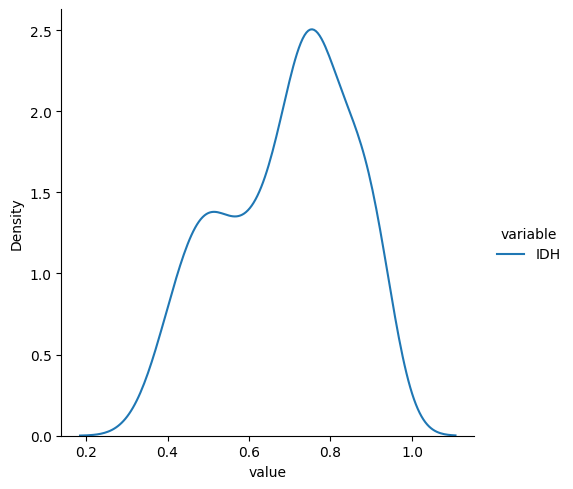

In [265]:
sns.displot(pd.melt(theMapAndData1[DataNames1]),
            x="value", hue="variable",kind="kde",
            log_scale=(False,False))

In [266]:
# !pip install -U scikit-learn

* **QuantileTransformer**:

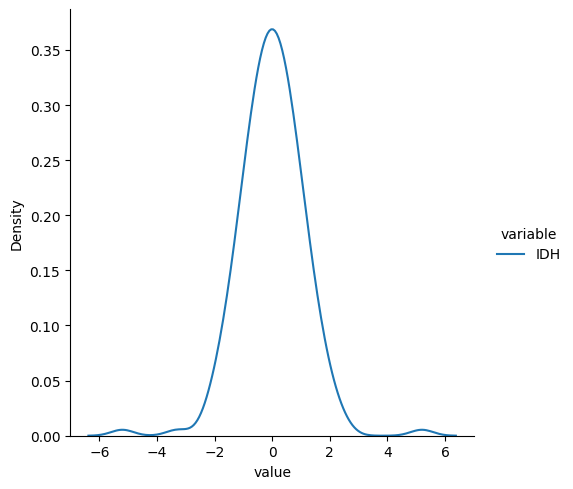

In [267]:
from sklearn.preprocessing import QuantileTransformer
scaler1 = QuantileTransformer(n_quantiles=99, random_state=0,output_distribution='normal') #or 'uniform'
QtScaled_data1 = scaler1.fit_transform(theMapAndData1[DataNames1])

sns.displot(pd.melt(pd.DataFrame(QtScaled_data1,columns=DataNames1)),
            x="value", hue="variable",kind="kde",
            log_scale=(False,False))

In [268]:
theMapAndData1['IDH_Qt']=QtScaled_data1[:,0]

In [269]:
theMapAndData1_clean = theMapAndData1.dropna(subset=['IDH_Qt'])
theVar3 = theMapAndData1_clean['IDH_Qt']

In [270]:
np.random.seed(12345) # so we all get the same results!

# let's try 5 intervals
K=5
theVar3 = theMapAndData1_clean.IDH_Qt
# same interval width, easy interpretation
ei5_3 = mapclassify.EqualInterval(theVar3, k=K)
# same interval width based on standard deviation, easy - but not as the previous one, poor when high skewness
msd3 = mapclassify.StdMean(theVar3)
# interval width varies, counts per interval are close, not easy to grasp, repeated values complicate cuts
q5_3 = mapclassify.Quantiles(theVar3,k=K)

# based on similarity, good for multimodal data
mb5_3 = mapclassify.MaximumBreaks(theVar3, k=K)
# based on similarity, good for skewed data
ht3 = mapclassify.HeadTailBreaks(theVar3) # no K needed
# based on similarity, optimizer
fj5_3 = mapclassify.FisherJenks(theVar3, k=K)
# based on similarity, optimizer
jc5_3 = mapclassify.JenksCaspall(theVar3, k=K)
# based on similarity, optimizer
mp5_3 = mapclassify.MaxP(theVar3, k=K)

In [271]:
## Use ADCM to make the comparisson and select the right classification
class5_3 = ei5_3,msd3, q5_3,mb5_3,  ht3, fj5_3, jc5_3, mp5_3
# Collect ADCM for each classifier
fits3 = np.array([ c.adcm for c in class5_3])
# Convert ADCM scores to a DataFrame
adcms3 = pd.DataFrame(fits3)
# Add classifier names
adcms3['classifier'] = [c.name for c in class5_3]
# Add column names to the ADCM
adcms3.columns = ['ADCM_IDH', 'Classifier']

<Axes: ylabel='Classifier'>

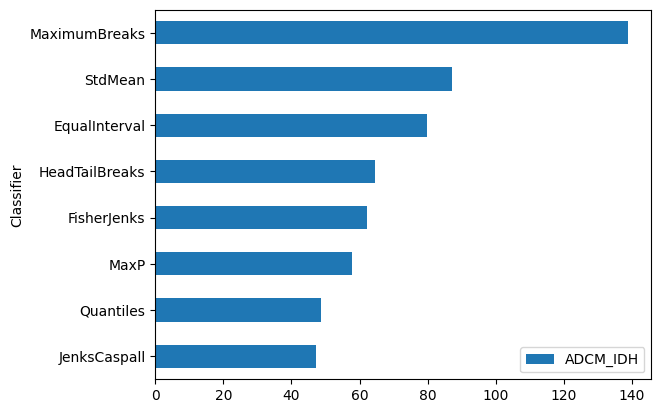

In [272]:
## Plot the adcms:
adcms3.sort_values('ADCM_IDH').plot.barh(x='Classifier')

In [273]:
## Save the best strategy:
theMapAndData1_clean['IDH_Qt_jc5_3'] = jc5_3.yb

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [274]:
# there you are
theMapAndData1_clean[['IDH_Qt','IDH_Qt_jc5_3']].head()

IDH_Qt  IDH_Qt_jc5_3
0  0.508554             3
1 -1.330215             0
2  0.224022             2
3  0.102491             2
4  0.102491             2

In [275]:
## The mean of 'fragility_Qt' by the labels of the columns created
indexList3=['IDH_Qt_jc5_3'] # add more?
aggregator3={'IDH_Qt': ['mean']}

pd.concat([theMapAndData1_clean[['IDH_Qt',col]].groupby(col,as_index=False).agg(aggregator3) for col in indexList3],axis=1)

IDH_Qt_jc5_3    IDH_Qt
                    mean
0            0 -1.584537
1            1 -0.585214
2            2  0.026807
3            3  0.659686
4            4  1.660177

In [276]:
## We could create a new column

# renaming
newLabelsForLevels3={0:"0_Great", 1:"1_Good", 2:"2_Middle", 3:"3_Bad", 4:"4_Poor"}

theMapAndData1_clean['IDH_Qt_jc5_3_cat']=theMapAndData1_clean.loc[:,'IDH_Qt_jc5_3'].replace(newLabelsForLevels3)

# we have
theMapAndData1_clean[['IDH_Qt','IDH_Qt_jc5_3','IDH_Qt_jc5_3_cat']].head(20)

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


IDH_Qt  IDH_Qt_jc5_3 IDH_Qt_jc5_3_cat
0   0.508554             3            3_Bad
1  -1.330215             0          0_Great
2   0.224022             2         2_Middle
3   0.102491             2         2_Middle
4   0.102491             2         2_Middle
5   0.913979             3            3_Bad
6  -0.821094             1           1_Good
7  -0.141214             2         2_Middle
8   0.812528             3            3_Bad
9   2.468596             4           4_Poor
10  1.181792             4           4_Poor
11  0.721089             3            3_Bad
12  0.522351             3            3_Bad
13 -0.154754             2         2_Middle
14  0.555089             3            3_Bad
15 -0.681525             1           1_Good
16 -0.100465             2         2_Middle
17  0.102491             2         2_Middle
18 -0.329453             1           1_Good
19 -0.792643             1           1_Good

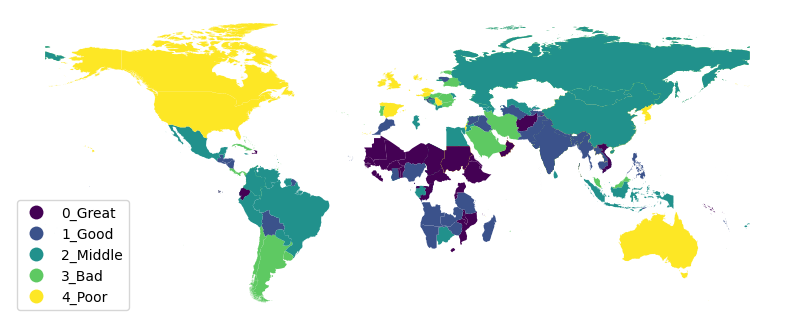

In [277]:
## We are ready for a choropleth:

import matplotlib.pyplot as plt

f, ax = plt.subplots(1, figsize=(10, 10))
theMapAndData1_clean.plot(column='IDH_Qt_jc5_3_cat', # variable to plot
                   cmap='viridis', # set of colors
                   categorical=True, # can be interpreted as category
                   edgecolor='white', # border color
                   linewidth=0., # width of border
                   alpha=1, # level of transparency (0 is invisible)
                   legend=True, # need a legend?
                   # location of legend: 'best', 'upper right', 'upper left', 'lower left',
                   # 'lower right', 'right', 'center left', 'center right',
                   # 'lower center', 'upper center', 'center'
                   legend_kwds={'loc':"lower left"},
        ax=ax
       )

ax.set_axis_off()

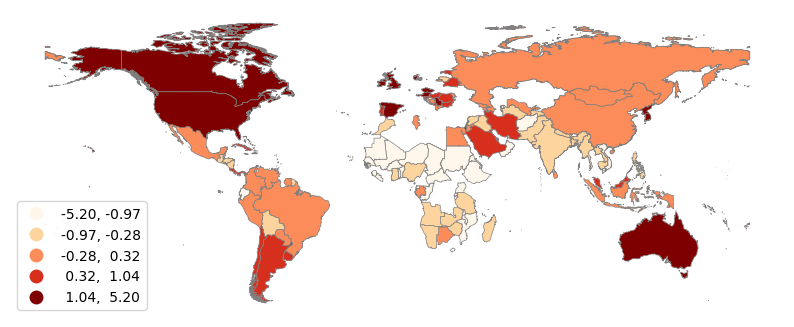

In [278]:
## Once you know the ADCM:
# you can request the choropleth without creating a variable:

import matplotlib.pyplot as plt

f, ax = plt.subplots(1, figsize=(10, 10))
theMapAndData1_clean.plot(column='IDH_Qt',
                   cmap='OrRd',
                   scheme="jenkscaspall",k=5,
        edgecolor='grey',
        linewidth=0.5,
        alpha=1,
        legend=True,
        legend_kwds={'loc':3},
        ax=ax
       )

ax.set_axis_off()

In [279]:
# finally

theMapAndData.to_file(os.path.join("mapas","worldMaps.gpkg"), layer='indicators', driver="GPKG")
theMapAndData1_clean.to_file(os.path.join("mapas","worldMaps.gpkg"), layer='indicators', driver="GPKG")